In [1]:
# Importando o dataset de troponina
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

<Axes: >

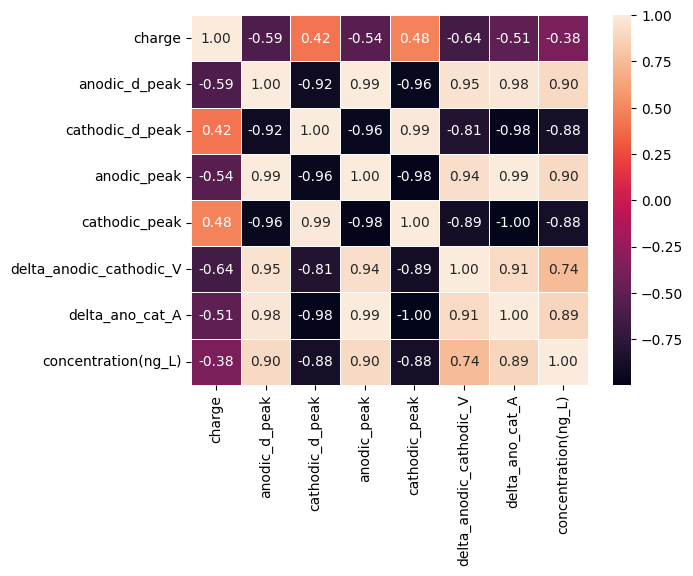

In [12]:
df = pd.read_csv('/home/pedro/Documentos/Workspace/heart_attack_analysis/data/troponin_concentration.csv', index_col=0)
df.head()
correlation = df.corr()
sn.heatmap(correlation, annot=True, fmt='.2f', linewidths=.6)

In [13]:
# Como a carga apresenta baixa correlação, pode-se excluí-la
df_final = df.drop(['charge'], axis=1)

In [14]:
df_final.head()

,anodic_d_peak,cathodic_d_peak,anodic_peak,cathodic_peak,delta_anodic_cathodic_V,delta_ano_cat_A,concentration(ng_L)
0,574.549285,-776.727378,82.78919,-121.886,0.183673,204.67519,600.0
1,595.734679,-736.288308,84.18736,-114.475,0.199645,198.66236,1000.0
2,566.088223,-792.962771,82.22851,-122.168,0.177684,204.39651,1200.0
3,631.517141,-783.258857,90.86034,-128.999,0.215617,219.85934,2000.0
4,594.717561,-806.642917,87.18122,-129.212,0.193656,216.39322,2500.0


In [135]:
# Separando X e Y para regressão
Y = df_final.iloc[:,-1]
X = df_final[['anodic_d_peak']]

In [136]:
Y.head()

0     600.0
1    1000.0
2    1200.0
3    2000.0
4    2500.0
Name: concentration(ng_L), dtype: float64

In [137]:
X.head()

,anodic_peak
0,82.78919
1,84.18736
2,82.22851
3,90.86034
4,87.18122


## Regressão Linear

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [156]:
def calculate_coeff_determination(lr, x, y, poly = None):
    if (poly != None):
        features = poly.fit_transform(x.values.reshape(-1,1))
        r_sq = lr.score(features, y)
        return r_sq

In [139]:
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)
#Verificando o resultado
r_sq = lr.score(X.values, Y.values)
print('Coefficient of determination(R²):', r_sq)

Coefficient of determination(R²): 0.7939556936688819


In [140]:
# Avaliando a performance do modelo

# Intercepto
print('Intercepto:', lr.intercept_)

Intercepto: -39994.395076756446


In [141]:
def get_coefficients(model_regression, columns):
    # Observando os coeficientes
    coeff_df = pd.DataFrame(model_regression.coef_,columns,columns=['Coefficient'])
    return coeff_df

In [151]:
def get_regression_metrics(model_linear, y_test, x_test, model_poly = None):
    out = {
        'MAE': 0,
        'MSE': 0,
        'RMSE':0
    }
    if (model_poly != None):
        x_test = model_poly.fit_transform(x_test.reshape(-1, 1))
        
    y_pred = model_linear.predict(x_test)
    out['MAE'] = metrics.mean_absolute_error(y_test, y_pred)
    out['MSE'] = metrics.mean_squared_error(y_test, y_pred)
    out['RMSE'] = np.sqrt(out['MSE'])
    return out

In [143]:
# Observando os coeficientes
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
anodic_peak,471.410023


In [144]:
# Imprimindo os erros
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2691.7486122900445
MSE: 7313473.705545721
RMSE: 2704.343488824177


In [145]:
x = np.concatenate((x_train, x_test))
y_true = np.concatenate((y_train, y_test))
y_pred = lr.predict(x)
print(x.shape)
print(y_true.shape)
print(y_pred.shape)

(9, 1)
(9,)
(9,)


In [146]:
print(x)

[[ 84.18736]
 [ 87.18122]
 [118.7837 ]
 [103.6226 ]
 [ 90.86034]
 [ 82.78919]
 [100.9126 ]
 [112.3159 ]
 [ 82.22851]]


## Polynomial Regression

In [158]:
from sklearn.preprocessing import PolynomialFeatures
degrees = [2, 3, 4]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(x_train.values.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    mectrics = get_regression_metrics(poly_reg_model, y_test.values, x_test.values, poly)
    r_sq = calculate_coeff_determination(poly_reg_model, X, Y, poly)
    
    print('Coefficient of determination(R²):', r_sq)
    print('MAE:', mectrics['MAE'])
    print('MSE:', mectrics['MSE'])
    print('RMSE:', mectrics['RMSE'])
    print('------------------------------------------')

Coefficient of determination(R²): 0.9616336283436017
MAE: 1607.2008164797735
MSE: 3712645.595315737
RMSE: 1926.8226683625396
------------------------------------------
Coefficient of determination(R²): 0.9934452544060925
MAE: 844.2958626586478
MSE: 726721.6255160184
RMSE: 852.4796921428793
------------------------------------------
Coefficient of determination(R²): 0.9701592283307581
MAE: 1929.0101559627801
MSE: 4502841.227820888
RMSE: 2121.989921705777
------------------------------------------
